In [3]:
import  pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
df=pd.read_csv('G:\\ML\\mechine_learning_playlist\\feature engineering\\titanic.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.groupby(['Sex'])['Survived','Pclass'].mean()

C:\Users\SOMASH~1\AppData\Local\Temp/ipykernel_5652/3520353361.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Sex'])['Survived','Pclass'].mean()


,Survived,Pclass
Sex,,
female,0.742038,2.159236
male,0.188908,2.389948


<AxesSubplot:>

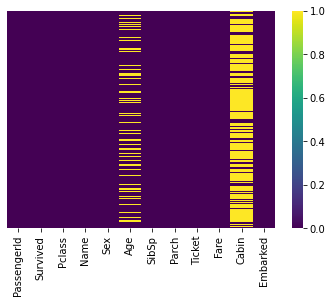

In [20]:
import seaborn  as sns
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis')

In [32]:
def impute_nan(df,variable1,variable2,median):
    df[variable1+"_nan"]=df[variable1]
    random_value=df[variable1].dropna().sample(df[variable1].isnull().sum(),replace=True,random_state=0)
    random_value.index=df[df[variable1].isnull()].index
    df.loc[df[variable1].isnull(),variable1+"_nan"]=random_value
    df[variable2+"_nan"]=df[variable2].fillna(median)

In [33]:
impute_nan(df,'Cabin','Age',df['Age'].median())

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_nan,Age_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,B22,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,D35,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,F33,35.0


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_nan        0
Age_nan          0
dtype: int64

In [68]:
label=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Age']
df.drop(labels=label,axis=1,inplace=True)

In [69]:
# df1=df['Survived']
# df1

In [72]:
# x_train=df.drop(labels='Survived')
# y_train=df['Survived']
pd.get_dummies(df['Sex'],drop_first=tru)

In [73]:
x_train=df.drop('Survived',axis=1)
x_train

,Pclass,Sex,Fare,Embarked,Cabin_nan,Age_nan
0,3,male,7.2500,S,B22,22.0
1,1,female,71.2833,C,C85,38.0
2,3,female,7.9250,S,D35,26.0
3,1,female,53.1000,S,C123,35.0
4,3,male,8.0500,S,F33,35.0
...,...,...,...,...,...,...
886,2,male,13.0000,S,C92,27.0
887,1,female,30.0000,S,B42,19.0
888,3,female,23.4500,S,D6,28.0
889,1,male,30.0000,C,C148,26.0


In [63]:
y_train=df['Survived']

In [64]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [65]:
X_train,X_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [66]:
model=LogisticRegression()

In [67]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Partner, Mr. Austen'